In [1]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *
from fastai2.vision.gan import *
from PIL import ImageDraw, ImageFont, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = False # ignores metadata of large, compressed images
import pdb
from tqdm import tqdm_notebook
import gc

from config import *
from preprocess import *
from train import *

In [2]:
gpu_idx = 2
torch.cuda.set_device(gpu_idx)
print(f"Using {torch.cuda.get_device_name(gpu_idx)} at index {torch.cuda.current_device()}")

Using GeForce GTX 1080 at index 2


In [3]:
TESTING = Path(DATA/"testing")
TESTING.mkdir(exist_ok=True)

In [21]:
fonts = L(Path(DATA/"fonts").rglob("*.ttf"))
clean_images = get_image_files(CLEAN)[:10]
markr = Markr(TESTING, fonts)

# parallel(markr, clean_images, n_workers=12);

img = load_image(clean_images[0], mode="RGBA")
blank_img = Image.new('RGBA', img.size, (255, 255, 255, 0))

marked_img = markr.draw_repeating_text(img, blank_img)

**Tile Method**
1. Split image up into (max size of) 300px squares
2. Label tiles wheter they contain watermarked text or not (a watermarked image can have tiles with no watermarks!)

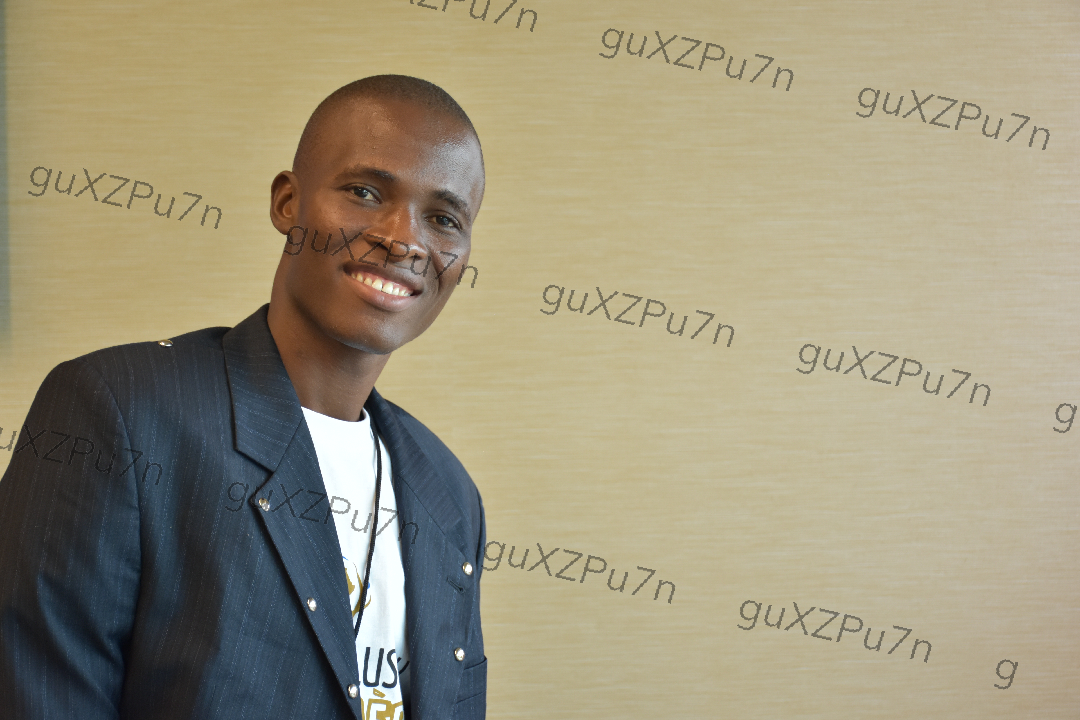

In [22]:
marked_img